# General Template

**Import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from imblearn.over_sampling import SMOTE

# Impport own functions
import importlib
import cleaning_pipeline, plots

c = importlib.reload(cleaning_pipeline)
p = importlib.reload(plots)

**Import**

In [2]:
data = pd.read_csv("data.csv")
data = data.rename(columns ={'Numeric_Variable' : 'target', 'NaN_Column' : 'irrelevant_column' })
data

,Date,Binary_Variable,Categorical_Variable,target,Empty_Column,irrelevant_column,Outlier_Column
0,2023-01-08 00:32:25,1,Category_B,23.998808,NaN,NaN,200
1,2023-12-07 08:53:31,0,Category_A,19.892576,NaN,NaN,200
2,2023-07-31 08:40:21,1,Category_A,25.304756,NaN,NaN,200
3,2023-01-30 19:09:40,0,Category_A,16.428919,NaN,NaN,200
4,2023-08-19 12:44:26,0,Category_B,20.909895,NaN,NaN,200
...,...,...,...,...,...,...,...
95,2023-02-24 18:09:24,1,Category_A,124.098565,NaN,NaN,1000
96,2023-01-23 06:29:09,0,Category_C,22.438297,NaN,NaN,200
97,2023-04-30 14:04:48,1,Category_A,18.337931,NaN,NaN,200
98,2023-12-20 08:47:28,1,Category_C,19.575549,NaN,NaN,200


## Exploration
**Get columns by datatype**

In [3]:
numeric_cols, non_numeric_cols, categorical_cols, binary_cols, date_cols = c.categorize_columns(data)
target = data['target']
print("Numeric Columns:", numeric_cols)
print("Non-Numeric Columns:", non_numeric_cols)
print("Categorical Columns:", categorical_cols)
print("Binary Columns:", binary_cols)
print("Date Columns:", date_cols)

Numeric Columns: ['Binary_Variable', 'target', 'Outlier_Column']
Non-Numeric Columns: ['Date', 'Categorical_Variable']
Categorical Columns: ['Date', 'Categorical_Variable']
Binary Columns: []
Date Columns: []


**Descriptive statistics**

In [4]:
c = importlib.reload(cleaning_pipeline)
p = importlib.reload(plots)

In [5]:
# Generate descriptive statistics
description = data.describe(include='all')  # Generate descriptive statistics for all columns
print(description)

# Report inconsitancies and null values
format_report = c.generate_format_report(data, 'sigma')
for column, counts in format_report.items():
    print(f"Column '{column}': \n \
    Empty count = {counts['empty_count']} i.e. {counts['empty_count_percentage']} of the obs., \n \
    Outliers_count = {counts['outliers_count']} i.e. {counts['outliers_percentage']} of the obs.")

                       Date  Binary_Variable Categorical_Variable   
count                   100       100.000000                  100  \
unique                  100              NaN                    3   
top     2023-01-08 00:32:25              NaN           Category_B   
freq                      1              NaN                   39   
mean                    NaN         0.460000                  NaN   
std                     NaN         0.500908                  NaN   
min                     NaN         0.000000                  NaN   
25%                     NaN         0.000000                  NaN   
50%                     NaN         0.000000                  NaN   
75%                     NaN         1.000000                  NaN   
max                     NaN         1.000000                  NaN   

             target  Empty_Column  irrelevant_column  Outlier_Column  
count     99.000000           0.0                0.0      100.000000  
unique          NaN          

**Visualisation**

*Numeric variables*

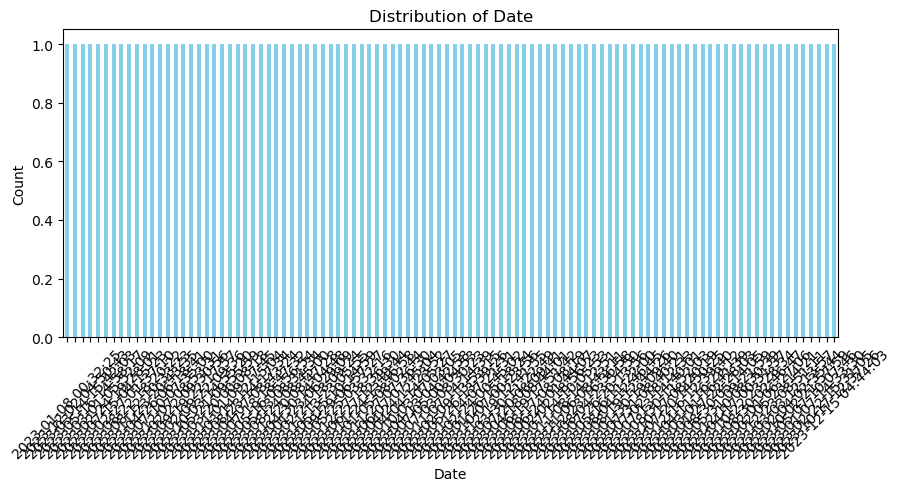

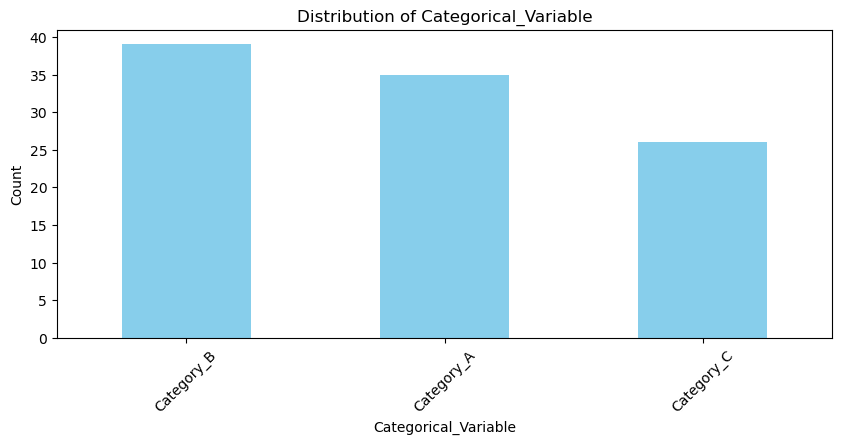

<Figure size 400x400 with 0 Axes>

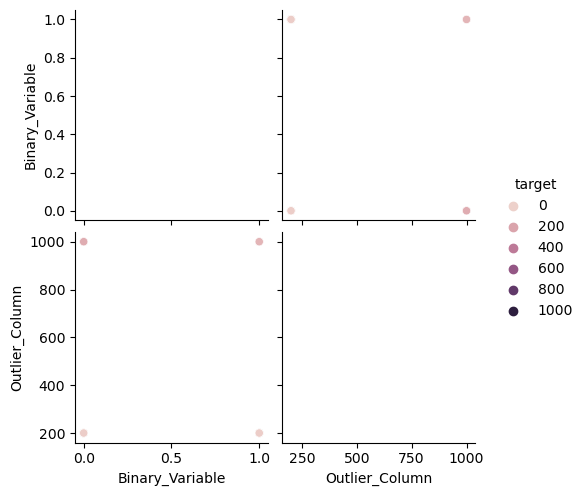

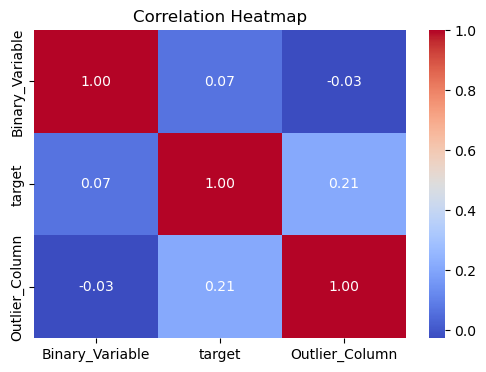

In [6]:
for column in non_numeric_cols:
    histogram_fig = p.visualize_categorical_distribution(data, column)
    plt.show(histogram_fig)

# Visualize relationships using pair plots (for numerical variables)
pairplot_fig = p.visualize_numeric_relationship_pairplot(data, numeric_cols, 'target')
plt.show(pairplot_fig)

# Visualize relationships using a heatmap (for correlation between numerical variables)
heatmap_fig = p.visualize_numeric_relationship_heatmap(data, numeric_cols)
plt.show(heatmap_fig)

*Non numeric variables*

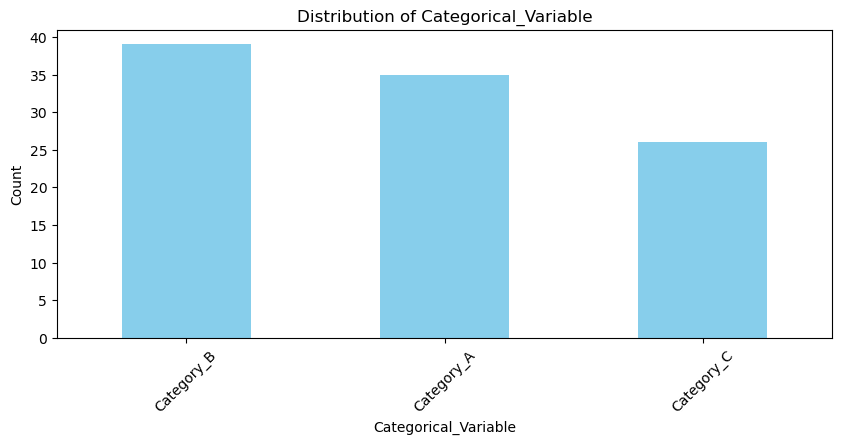

In [7]:
# should ^loop in non numeric here
visualize_categorical_distribution = p.visualize_categorical_distribution(data, 'Categorical_Variable')
plt.show(visualize_categorical_distribution)

## Cleaning

In [8]:
data.columns

data

,Date,Binary_Variable,Categorical_Variable,target,Empty_Column,irrelevant_column,Outlier_Column
0,2023-01-08 00:32:25,1,Category_B,23.998808,NaN,NaN,200
1,2023-12-07 08:53:31,0,Category_A,19.892576,NaN,NaN,200
2,2023-07-31 08:40:21,1,Category_A,25.304756,NaN,NaN,200
3,2023-01-30 19:09:40,0,Category_A,16.428919,NaN,NaN,200
4,2023-08-19 12:44:26,0,Category_B,20.909895,NaN,NaN,200
...,...,...,...,...,...,...,...
95,2023-02-24 18:09:24,1,Category_A,124.098565,NaN,NaN,1000
96,2023-01-23 06:29:09,0,Category_C,22.438297,NaN,NaN,200
97,2023-04-30 14:04:48,1,Category_A,18.337931,NaN,NaN,200
98,2023-12-20 08:47:28,1,Category_C,19.575549,NaN,NaN,200


In [9]:
numeric_cols

['Binary_Variable', 'target', 'Outlier_Column']

In [10]:
data_cleaned = c.handle_null_values(data, 'target')
data_cleaned = c.handle_duplicates(data_cleaned)

# String
data_cleaned = c.handle_formatting_inconsistencies(data_cleaned, ['Categorical_Variable'])
data_cleaned = c.handle_text_data(data_cleaned, 'Categorical_Variable' )
data_cleaned = c.handle_categorical_data(data_cleaned, ['Categorical_Variable'])

data_cleaned = c.handle_date_time_data(data_cleaned, ['Date'])

data_cleaned = c.handle_redundant_features(data_cleaned, ['irrelevant_column'])
data_cleaned = c.transform_data(data_cleaned, numeric_cols)

# # Numeric columns
data_cleaned = c.scale_numerical_features(data_cleaned, numeric_cols )

# Numeric columns
data_cleaned = c.handle_outliers_iqr(data_cleaned, 'target' )


**Outlier**

In [11]:
data

,Date,Binary_Variable,Categorical_Variable,target,Empty_Column,irrelevant_column,Outlier_Column
0,2023-01-08 00:32:25,1,Category_B,23.998808,NaN,NaN,200
1,2023-12-07 08:53:31,0,Category_A,19.892576,NaN,NaN,200
2,2023-07-31 08:40:21,1,Category_A,25.304756,NaN,NaN,200
3,2023-01-30 19:09:40,0,Category_A,16.428919,NaN,NaN,200
4,2023-08-19 12:44:26,0,Category_B,20.909895,NaN,NaN,200
...,...,...,...,...,...,...,...
95,2023-02-24 18:09:24,1,Category_A,124.098565,NaN,NaN,1000
96,2023-01-23 06:29:09,0,Category_C,22.438297,NaN,NaN,200
97,2023-04-30 14:04:48,1,Category_A,18.337931,NaN,NaN,200
98,2023-12-20 08:47:28,1,Category_C,19.575549,NaN,NaN,200


In [12]:
# Choose a outlier rule
lower_bound, upper_bound = c.filter_outliers_sigma(data, 'target')
# lower_bound, upper_bound = handle_outliers_iqr(data, 'numeric_col')

# Filter df
filtered_df = data[(data['target'] >= lower_bound) & (data['target'] <= upper_bound)]

**Eventual Saving of the cleaned data**

In [13]:
# Save the cleaned data to a new file
#data_cleaned.to_csv('cleaned_dataset.csv', index=False)

In [14]:

c = importlib.reload(cleaning_pipeline)
p = importlib.reload(plots)